In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<Axes: title={'center': 'MODELYEAR'}>,
        <Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_HWY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>, <Axes: >]], dtype=object)

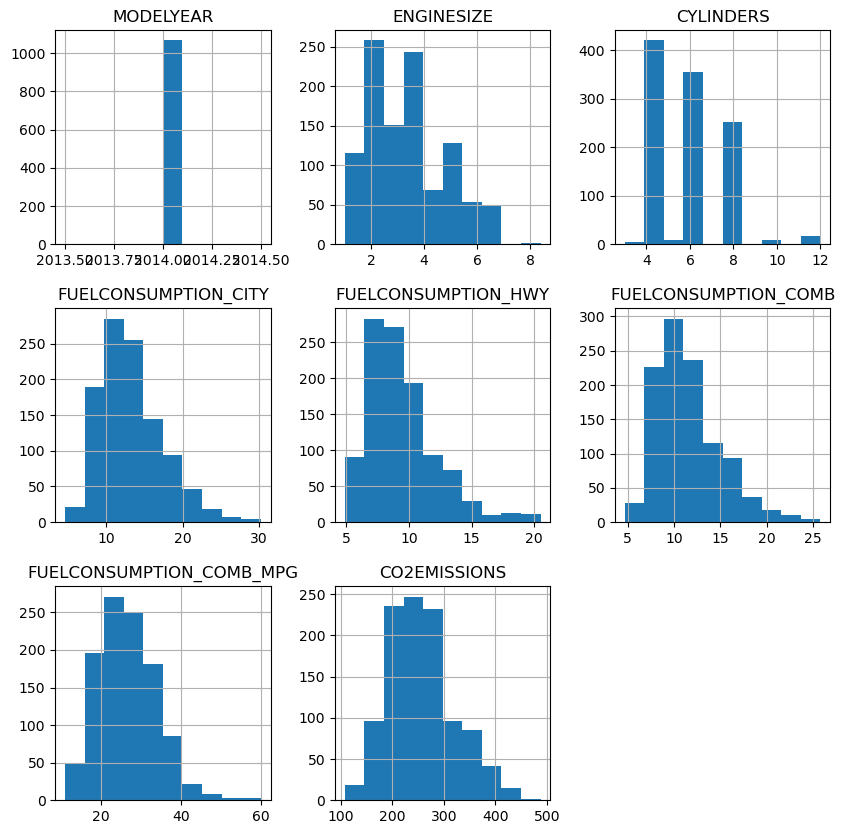

In [5]:
df.hist(figsize=(10,10))

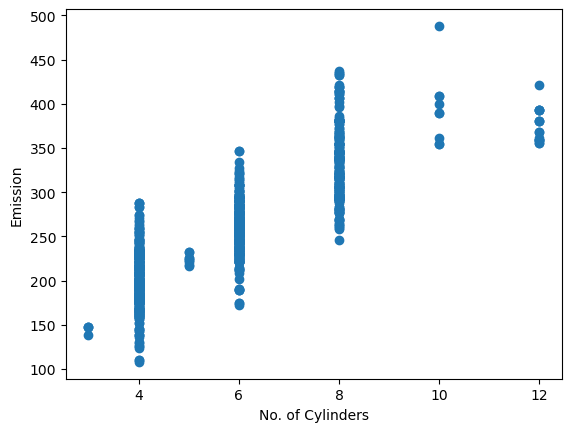

In [7]:
#(1) CYLINDERS VS CO2EMISSIONS

plt.scatter(df["CYLINDERS"] , df["CO2EMISSIONS"])
plt.xlabel("No. of Cylinders")
plt.ylabel("Emission")
plt.show()

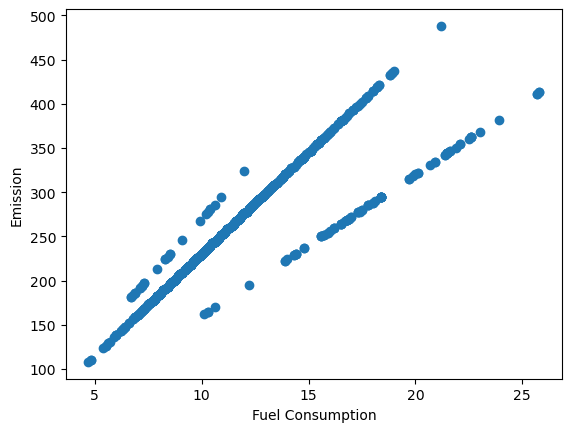

In [8]:
#(2) FUELCONSUMPTION_COMB VS CO2EMISSIONS

plt.scatter(df["FUELCONSUMPTION_COMB"] , df["CO2EMISSIONS"])
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

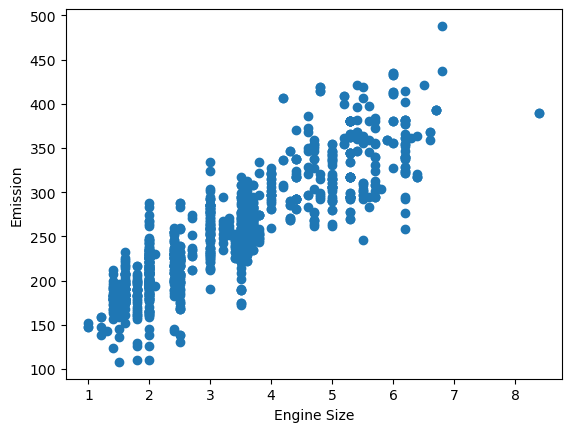

In [9]:
#(3) ENGINESIZE VS CO2EMISSIONS

plt.scatter(df["ENGINESIZE"] , df["CO2EMISSIONS"])
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [10]:
# Generating training and testing data from our data :

#np.random.rand(n);  here n is the total number of random numbers you want to generate. These numbers are always between 0 and 1

import numpy as np
msk = np.random.rand(len(df))<0.8
msk

array([ True,  True,  True, ...,  True, False,  True])

In [13]:
# Taking 80% of the data for training and 20% for testing.

train = df[:(int((len(df)*0.8)))]
test = df[(int((len(df)*0.8))):]

print ("Training Data",train.shape)
print ("Testing Data",test.shape)
print ("Total Data",df.shape)

Training Data (853, 13)
Testing Data (214, 13)
Total Data (1067, 13)


In [14]:
# Finding the average co2 emission :

Emission = df["CO2EMISSIONS"]

sum_emission = Emission.sum()
num_cars = len(Emission)
avg_prices1 = sum_emission/num_cars
avg_prices2 = Emission.mean()
print (avg_prices1)
print (avg_prices2)

256.2286785379569
256.2286785379569


In [15]:
# Main function to find Slope and Intercept :

def simple_linear_regression(input_feature,output):
    Xi = input_feature
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept,slope)

In [16]:
test_feature = np.array(range(5))
test_output = np.array(1+1*test_feature)

(test_intercept,test_slope) = simple_linear_regression(test_feature,test_output)

print ("Intercept :",test_intercept)
print ("Slope :" , test_slope)

Intercept : 1.0
Slope : 1.0


In [18]:
# Finding slope and Interccept for actual data :

co2_intercept , co2_slope = simple_linear_regression(train["ENGINESIZE"],train["CO2EMISSIONS"])

print ("Intercept",co2_intercept)
print ("Slope",co2_slope)

Intercept 127.16989950881947
Slope 38.79512383605651


In [19]:
#Equation of best fit regression line :

print ("Y =",co2_intercept,"*X +",co2_slope)

Y = 127.16989950881947 *X + 38.79512383605651


Text(0, 0.5, 'CO_2_Emission')

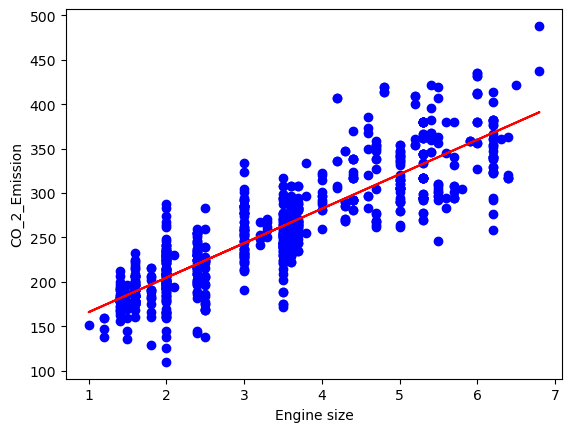

In [21]:
# Plotting regression line with data points :

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(train["ENGINESIZE"], co2_slope*train["ENGINESIZE"] + co2_intercept, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO_2_Emission")

In [22]:
# Function for predicting future values :

def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [23]:
# Predicting emission for future car :

my_engine_size = 4.8

estimatd_emission = get_regression_predictions(my_engine_size,co2_intercept,co2_slope)
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350172


In [24]:

def residual_sum_of_squares(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return (RSS)

In [25]:
print (residual_sum_of_squares(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

159741.10295932184


In [26]:
# Calculate the error for our train dataset:

print (residual_sum_of_squares(train["ENGINESIZE"],train["CO2EMISSIONS"],co2_intercept,co2_slope))

850827.1822780487


In [27]:
# Function to calculate Mean Squared Error(MSE):

def Mean_Square_Error(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)*(Yi - prediction)).sum()
    
    MSE = var/len(Yi)
    
    return MSE

In [28]:
#Calculating MSE :

print (Mean_Square_Error(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

746.4537521463637


In [29]:
# Function to calculate the R^2 :

def R_Squared(input_feature,output,intercept,slope):
    prediction = input_feature*slope + intercept
    
    residual = output - prediction
    
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

In [30]:
# Caluclating the R^2 for our dataset :

print (R_Squared(test["ENGINESIZE"],test["CO2EMISSIONS"],co2_intercept,co2_slope))

0.7861345372905516


In [31]:
# Pedicting Enginesize from Co2-Emission :

def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [32]:
# Predicting engine size from co2-emission :

co2_emission = 250

estimatd_engine_size = inverse_regression_predictions(co2_emission,co2_intercept,co2_slope)
print ("Estimated Engine Size :",estimatd_engine_size)

Estimated Engine Size : 3.166122139737088
